# Threshold Evaluation

This stage evaluates the results with the detector, comparing them with the original spiketrains. To do this, it requires to load the NEO files and then, for each of them, load the corresponding files with the detection results.

## Loading NEO files

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
BASE_DIR="/mnt/Archivos/data"

In [3]:
from eapprocessor.tools.load import loadNEO, loadCountEvaluation, getEvaluationFiles

In [4]:
noise_levels = [5, 10, 15, 20, 25, 50 ,75]
resolution = 12

In [5]:
neo_list=[]
neo_files=[]
for noise_level in noise_levels:
    neo_dict, file = loadNEO(f"{BASE_DIR}/output/preprocessor", verbose=True, resolution=resolution, 
                       noise_level=noise_level)
    neo_list += [neo_dict]
    neo_files += [file]

_12_5uV_
Loading file /mnt/Archivos/data/output/preprocessor/preprocessed_neo_12_5uV_2021-09-28_00-07.h5
_12_10uV_
Loading file /mnt/Archivos/data/output/preprocessor/preprocessed_neo_12_10uV_2021-09-28_00-07.h5
_12_15uV_
Loading file /mnt/Archivos/data/output/preprocessor/preprocessed_neo_12_15uV_2021-09-28_00-08.h5
_12_20uV_
Loading file /mnt/Archivos/data/output/preprocessor/preprocessed_neo_12_20uV_2021-09-28_00-09.h5
_12_25uV_
Loading file /mnt/Archivos/data/output/preprocessor/preprocessed_neo_12_25uV_2021-09-28_00-10.h5
_12_50uV_
Loading file /mnt/Archivos/data/output/preprocessor/preprocessed_neo_12_50uV_2021-09-28_00-11.h5
_12_75uV_
Loading file /mnt/Archivos/data/output/preprocessor/preprocessed_neo_12_75uV_2021-09-28_00-11.h5


Exploring the neo list of dictionaries and the neo files:

In [6]:
print("Neo list", neo_list)
print("Neo files", neo_files)

Neo list [{'adcinfo': {'resolution': 12, 'voltage_ref': 500}, 'adc': <HDF5 dataset "adc": shape (32, 320000), type "<i8">, 'normalized': <HDF5 dataset "normalized": shape (32, 320000), type "<f8">, 'recordings': <MEArec.generators.recordinggenerator.RecordingGenerator object at 0x7fa8c04c3f40>, 'w': <HDF5 dataset "w": shape (5,), type "<i8">, 'neo': <HDF5 dataset "neo": shape (5, 32, 320000), type "<f8">}, {'adcinfo': {'resolution': 12, 'voltage_ref': 500}, 'adc': <HDF5 dataset "adc": shape (32, 320000), type "<i8">, 'normalized': <HDF5 dataset "normalized": shape (32, 320000), type "<f8">, 'recordings': <MEArec.generators.recordinggenerator.RecordingGenerator object at 0x7fa8c0038ee0>, 'w': <HDF5 dataset "w": shape (5,), type "<i8">, 'neo': <HDF5 dataset "neo": shape (5, 32, 320000), type "<f8">}, {'adcinfo': {'resolution': 12, 'voltage_ref': 500}, 'adc': <HDF5 dataset "adc": shape (32, 320000), type "<i8">, 'normalized': <HDF5 dataset "normalized": shape (32, 320000), type "<f8">, 'r

## Load evaluators

Then for each NEO file grabs the corresponding evaluators

In [7]:
evaluator_files_dict_list = []
for neo_file in neo_files:
    file_dict = getEvaluationFiles(f"{BASE_DIR}/output/evaluator",sourcefile=neo_file) 
    evaluator_files_dict_list += [file_dict]

*
Filename found 3 files with source /mnt/Archivos/data/output/preprocessor/preprocessed_neo_12_5uV_2021-09-28_00-07.h5
*
Filename found 3 files with source /mnt/Archivos/data/output/preprocessor/preprocessed_neo_12_10uV_2021-09-28_00-07.h5
*
Filename found 3 files with source /mnt/Archivos/data/output/preprocessor/preprocessed_neo_12_15uV_2021-09-28_00-08.h5
*
Filename found 3 files with source /mnt/Archivos/data/output/preprocessor/preprocessed_neo_12_20uV_2021-09-28_00-09.h5
*
Filename found 3 files with source /mnt/Archivos/data/output/preprocessor/preprocessed_neo_12_25uV_2021-09-28_00-10.h5
*
Filename found 3 files with source /mnt/Archivos/data/output/preprocessor/preprocessed_neo_12_50uV_2021-09-28_00-11.h5
*
Filename found 3 files with source /mnt/Archivos/data/output/preprocessor/preprocessed_neo_12_75uV_2021-09-28_00-11.h5


Then, loads the count values to plot and compare them

In [8]:
counts_list = [loadCountEvaluation(**evaluator_files_dict) for evaluator_files_dict in evaluator_files_dict_list]

In [9]:
from eapprocessor.plot.evaluator import plotCountsEvaluator

In [10]:
%matplotlib inline

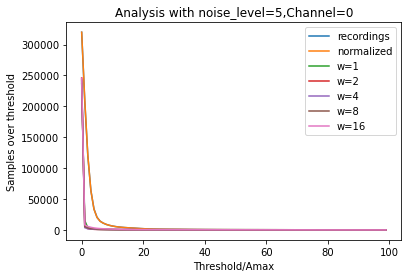

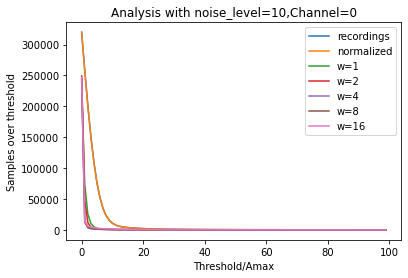

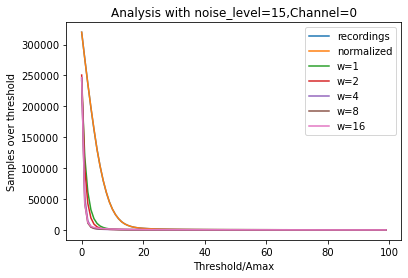

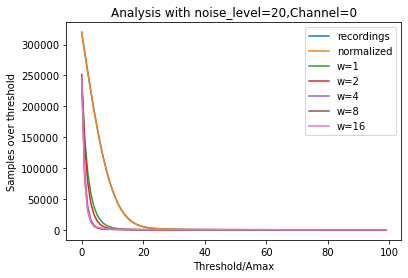

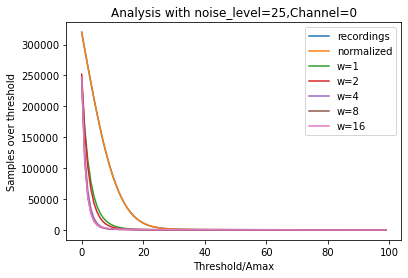

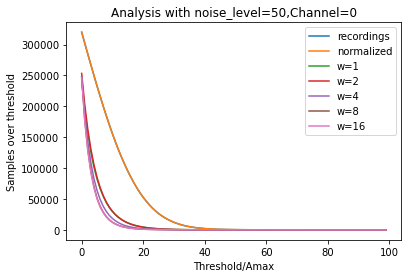

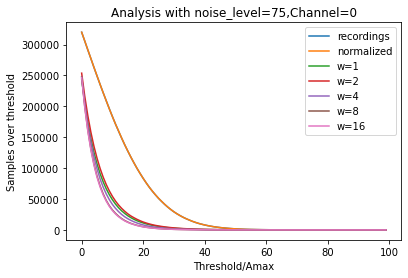

In [11]:
for ind in range(len(counts_list)):
    plotCountsEvaluator(counts_list[ind],neo_list[ind], channels_idx=range(1))

## Evaluating neo with 5uV noise

Use the first recording to explore and evaluate the results

### Exploring the spiketrains

As all the recordings has the same spiketrains, then taking the first neo_dict we can extract the spiketrains.

In [12]:
spiketrain_obj_list = neo_list[0]["recordings"].spiketrains

In [13]:
import numpy as np

In [14]:
spiketrain_list = [np.array(spiketrain[:]) for spiketrain in spiketrain_obj_list]
print(spiketrain_list[0])

[0.06306313 0.09835651 0.17468134 1.35781948 1.87151452 1.92956291
 2.45076891 2.54931775 2.72318618 3.5889415  4.11254186 4.23857638
 4.29791657 4.44321244 4.53272058 5.02129526 5.02602492 5.30705183
 5.59190746 5.62608856 5.77413182 5.7855642  6.46583001 7.68394504
 7.70296327 8.38360658 8.6482491  9.06565181 9.3717065  9.63996295
 9.64631662 9.71885169 9.96091592]


In general, all spiketrains has different number of spikes

In [15]:
spiketrain_count_list = [len(spiketrain) for spiketrain in spiketrain_list]
print(spiketrain_count_list)

[33, 49, 57, 44, 67, 58, 58, 109, 140, 158]


It also, has different types of cells (excitatory 'E' and inhibitory 'I')

In [16]:
spiketrain_type_list = [spiketrain.annotations["cell_type"] for spiketrain in spiketrain_obj_list]
print(spiketrain_type_list)

['E', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'I']


An important value to consider is the SNR

In [17]:
spiketrain_snr_list = [spiketrain.annotations["snr"] for spiketrain in spiketrain_obj_list]
print(spiketrain_snr_list)

[11.35437469482422, 16.42912902832031, 14.212496948242187, 13.60845947265625, 11.459243774414062, 45.022158813476565, 35.98013000488281, 51.535308837890625, 29.1014892578125, 26.659716796875]


With the info grabbed from spiketrains, it could be plotted with them

In [18]:
from eapprocessor.plot.spikes import plotSpikesArray, plotSpikesFromNeo

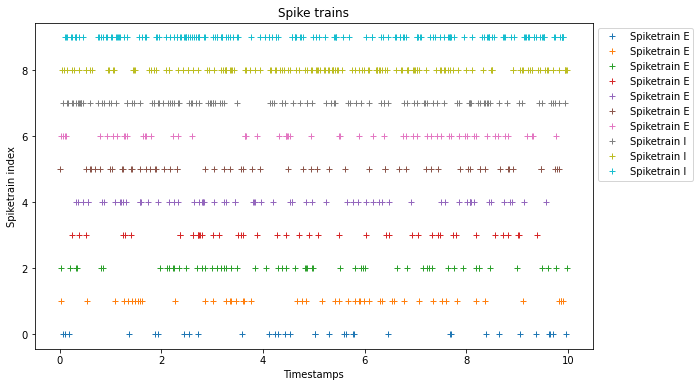

In [19]:
plotSpikesFromNeo(neo_dict)

### Estimate positions of spiketrains

This requires to approximate the spiketrains to positions in the timestamps. It uses the fist of neo objects at all have the same spiketrains.

In [20]:
timestamps = neo_list[0]["recordings"].timestamps[:]
print(timestamps)

[0.00000000e+00 3.12500000e-05 6.25000000e-05 ... 9.99990625e+00
 9.99993750e+00 9.99996875e+00]


In [21]:
from eapprocessor.evaluator.spikes import estimateSampleSpikes, comparisonDetectionSpiketrain

In [22]:
indexes_list = []
errors_list = []
for spiketrain in spiketrain_list:
    indexes, errors = estimateSampleSpikes(spikes=spiketrain,timestamps=timestamps)
    indexes_list += [indexes]
    errors_list += [errors]

In [23]:
print(indexes_list)

[array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.])]


We can explore the estimated positions for spiketrains related to the timestamps, and detect where there are two o mor spikes estimated in the same position:

In [24]:
indexes_total = np.sum(indexes_list, axis=0)
print(indexes_total)

[0. 0. 0. ... 0. 0. 0.]


In [25]:
max(indexes_total)

2.0

To explore where are those spike estimated in the same position:

In [26]:
import matplotlib.pyplot as plt

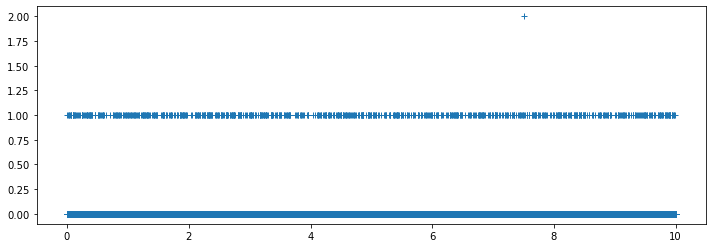

In [27]:
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(timestamps,indexes_total,'+')

In [28]:
nw_indexes_total = (indexes_total>0)*np.ones(indexes_total.shape)

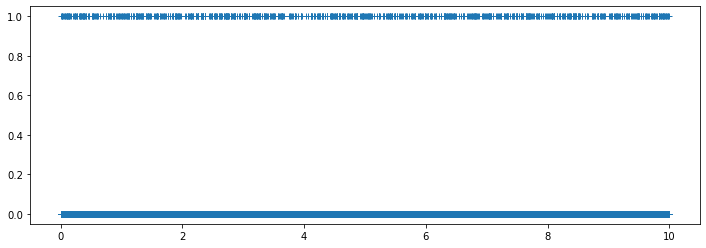

In [29]:
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(timestamps,nw_indexes_total,'+')

In [30]:
sum(nw_indexes_total)

772.0

The module written has a function that combine spikes positions and uniformize to 1.

In [31]:
from eapprocessor.evaluator.spikes import combineSpiketrains

In [32]:
uniformized_indexes_total = combineSpiketrains(indexes_list=indexes_list)
print("Max value:", max(uniformized_indexes_total))
print("Lenght value:", len(uniformized_indexes_total))
print("Total spikes:", len(uniformized_indexes_total[uniformized_indexes_total>0]))

Max value: 1.0
Lenght value: 320000
Total spikes: 772


### Evaluate with 5uV noise level

In [33]:
neo_dict = neo_list[0]
evaluator_files_dict = evaluator_files_dict_list[0]
print(neo_dict)
print(evaluator_files_dict)

{'adcinfo': {'resolution': 12, 'voltage_ref': 500}, 'adc': <HDF5 dataset "adc": shape (32, 320000), type "<i8">, 'normalized': <HDF5 dataset "normalized": shape (32, 320000), type "<f8">, 'recordings': <MEArec.generators.recordinggenerator.RecordingGenerator object at 0x7fa8c04c3f40>, 'w': <HDF5 dataset "w": shape (5,), type "<i8">, 'neo': <HDF5 dataset "neo": shape (5, 32, 320000), type "<f8">}
{'recordings_file': PosixPath('/mnt/Archivos/data/output/evaluator/threshold_recordings_subset_100th_12_5uV_2021-09-28_10-23.h5'), 'normalized_file': PosixPath('/mnt/Archivos/data/output/evaluator/threshold_normalized_subset_100th_12_5uV_2021-09-28_10-23.h5'), 'neo_file': PosixPath('/mnt/Archivos/data/output/evaluator/threshold_neo_subset_100th_12_5uV_2021-09-28_10-23.h5')}


In [34]:
from eapprocessor.tools.load import loadEvaluation

#### Evaluation with recordings

In [35]:
recordings_dict = loadEvaluation(evaluator_files_dict["recordings_file"])

Then, use the first channel for the whole test :

In [36]:
recordings_evaluation_first_channel = recordings_dict["indexes"][0]

In [37]:
result_evaluation_list = [comparisonDetectionSpiketrain(indexes, recordings_evaluation_first_channel[0]) 
          for indexes in indexes_list]
result_evaluation_list

[{'truepositive': 33.0,
  'falsepositive': 319967.0,
  'falsenegative': 0.0,
  'truenegative': 0.0},
 {'truepositive': 49.0,
  'falsepositive': 319951.0,
  'falsenegative': 0.0,
  'truenegative': 0.0},
 {'truepositive': 57.0,
  'falsepositive': 319943.0,
  'falsenegative': 0.0,
  'truenegative': 0.0},
 {'truepositive': 44.0,
  'falsepositive': 319956.0,
  'falsenegative': 0.0,
  'truenegative': 0.0},
 {'truepositive': 67.0,
  'falsepositive': 319933.0,
  'falsenegative': 0.0,
  'truenegative': 0.0},
 {'truepositive': 58.0,
  'falsepositive': 319942.0,
  'falsenegative': 0.0,
  'truenegative': 0.0},
 {'truepositive': 58.0,
  'falsepositive': 319942.0,
  'falsenegative': 0.0,
  'truenegative': 0.0},
 {'truepositive': 109.0,
  'falsepositive': 319891.0,
  'falsenegative': 0.0,
  'truenegative': 0.0},
 {'truepositive': 140.0,
  'falsepositive': 319860.0,
  'falsenegative': 0.0,
  'truenegative': 0.0},
 {'truepositive': 158.0,
  'falsepositive': 319842.0,
  'falsenegative': 0.0,
  'truenega

#### Evaluation with NEO

In [38]:
neo_evaluation_dict = loadEvaluation(evaluator_files_dict["neo_file"])

Evaluating with w=1 and with the first channel

In [39]:
neo_evaluation_first_channel = neo_evaluation_dict["indexes"][0][0]

Then, compare the indexes with the threshold at $0.05A_{\max}$

In [40]:
neo_results_first_channel = [comparisonDetectionSpiketrain(indexes, neo_evaluation_first_channel[5]) 
                             for indexes in indexes_list]
neo_results_first_channel

[{'truepositive': 0.0,
  'falsepositive': 962.0,
  'falsenegative': 33.0,
  'truenegative': 319005.0},
 {'truepositive': 23.0,
  'falsepositive': 939.0,
  'falsenegative': 26.0,
  'truenegative': 319012.0},
 {'truepositive': 0.0,
  'falsepositive': 962.0,
  'falsenegative': 57.0,
  'truenegative': 318981.0},
 {'truepositive': 8.0,
  'falsepositive': 954.0,
  'falsenegative': 36.0,
  'truenegative': 319002.0},
 {'truepositive': 0.0,
  'falsepositive': 962.0,
  'falsenegative': 67.0,
  'truenegative': 318971.0},
 {'truepositive': 1.0,
  'falsepositive': 961.0,
  'falsenegative': 57.0,
  'truenegative': 318981.0},
 {'truepositive': 54.0,
  'falsepositive': 908.0,
  'falsenegative': 4.0,
  'truenegative': 319034.0},
 {'truepositive': 0.0,
  'falsepositive': 962.0,
  'falsenegative': 109.0,
  'truenegative': 318929.0},
 {'truepositive': 1.0,
  'falsepositive': 961.0,
  'falsenegative': 139.0,
  'truenegative': 318899.0},
 {'truepositive': 1.0,
  'falsepositive': 961.0,
  'falsenegative': 15

By simple inspection, this neo can only capture spiketrains at index 1 and 6. However, to appreciate better, we plot them considering the true positive and false negative values.

Something interesting to denote is that for channel 6 which is apparently the predominant signal in the recording, there are two spikes not detected, so we can locate at the time and observe why are not detected.

In [41]:
from eapprocessor.evaluator.spikes import getFalseNegativesTimes, getFalseNegatives

In [42]:
getFalseNegatives(indexes_list[6],neo_evaluation_first_channel[0])

array([0., 0., 0., ..., 0., 0., 0.])

In [43]:
getFalseNegativesTimes(indexes_list[6],neo_evaluation_first_channel[0],timestamps)

array([1.643125  , 9.19009375])

#### Plot accuracy

To identify the signals that predominates in determined signal, we can plot the found spikes considering the truepositives and false negatives values.

In [44]:
truepositive = [ item["truepositive"] for item in neo_results_first_channel]
falsenegative = [ item["falsenegative"] for item in neo_results_first_channel]

In [45]:
from eapprocessor.plot.evaluator import plotAccuracyEvaluator

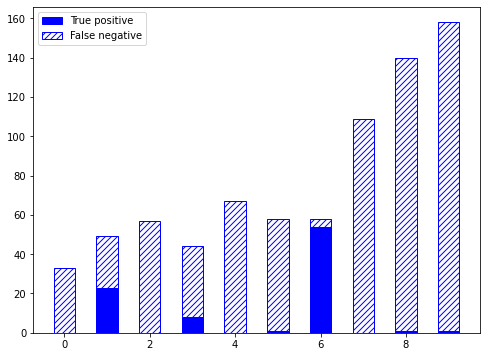

In [46]:
plotAccuracyEvaluator(truepositive,falsenegative)

### Plot ROC for first channel

In [47]:
from eapprocessor.evaluator.spikes import comparisonDetectionArraySpiketrainArray, convertToROC

In [48]:
comparison_list = [ comparisonDetectionArraySpiketrainArray(indexes_list, test_result[0]) 
                   for test_result in neo_evaluation_dict["indexes"] ]

In [49]:
comparison_list[0].shape

(100, 10)

In [51]:
tpr_list = []
fpr_list = []
for comparison in comparison_list:
    tpr, fpr = convertToROC(comparison, range_reference=[1,6])
    tpr_list +=[tpr]
    fpr_list +=[fpr]

In [52]:
tpr_list[0].shape

(100, 2)

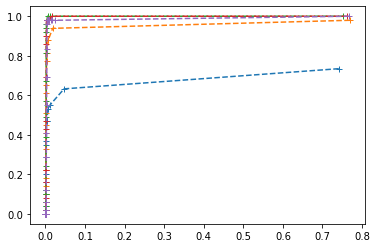

In [53]:
for idx in range(len(tpr_list)):
    plt.plot(fpr_list[idx][:,0],tpr_list[idx][:,0],'+--')

The module has a function to facilitate the plot of ROC curves

In [54]:
from eapprocessor.plot.evaluator import plotROCList

In [55]:
w = neo_dict["w"]
spike_indexes = [1,6]

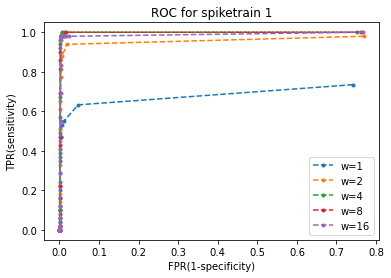

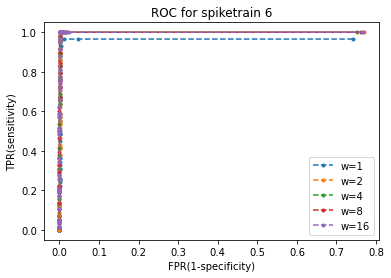

In [56]:
plotROCList(fpr_list=fpr_list, tpr_list=tpr_list, 
            labels=[f"w={w_i}" for w_i in w],
            spiketrains_labels=spike_indexes)

#### Evaluating combined effects

In [57]:
from eapprocessor.evaluator.spikes import combineSpiketrains, comparisonDetectionArraySpiketrain

In [58]:
indexes_list = np.array(indexes_list)
new_reference = combineSpiketrains(indexes_list=indexes_list[spike_indexes])

In [59]:
comparison_combined_list = [ comparisonDetectionArraySpiketrain(new_reference, test_result[0]) 
                   for test_result in neo_evaluation_dict["indexes"] ]

In [60]:
comparison_combined_list[0].shape

(100,)

In [61]:
combined_tpr_list = []
combined_fpr_list = []
for comparison in comparison_combined_list:
    tpr, fpr = convertToROC(comparison)
    combined_tpr_list +=[tpr]
    combined_fpr_list +=[fpr]

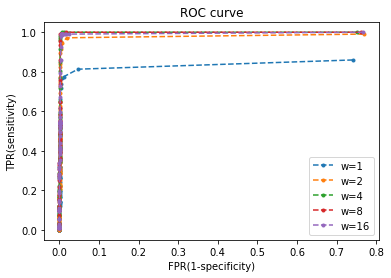

In [63]:
plotROCList(fpr_list=combined_fpr_list, tpr_list=combined_tpr_list, 
               labels=[f"w={w_i}" for w_i in w])

### Evaluating ROC for recordings at different noise levels

In [64]:
comparison_recordings = comparisonDetectionArraySpiketrainArray(indexes_list, recordings_dict["indexes"][0])

In [65]:
tpr_rec, fpr_rec = convertToROC(comparison_recordings, range_reference=[1,6])

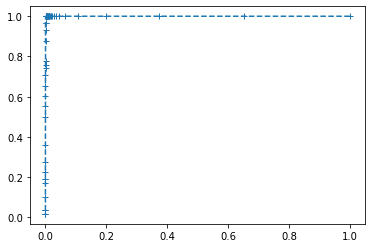

In [66]:
plt.plot(fpr_rec[:,1],tpr_rec[:,1],'+--')

In [67]:
dics_recording = [loadEvaluation(evaluator_files_dict["recordings_file"]) 
                  for evaluator_files_dict in evaluator_files_dict_list]

In [68]:
comparison_recordings_list = [comparisonDetectionArraySpiketrainArray(indexes_list, dic["indexes"][0]) 
                             for dic in dics_recording]

In [69]:
tpr_rec_list = []
fpr_rec_list = []
for comparison_rec in comparison_recordings_list:
    tpr_rec, fpr_rec = convertToROC(comparison_rec, range_reference=[1,6])
    tpr_rec_list +=[tpr_rec]
    fpr_rec_list +=[fpr_rec]

Plot for recordings at different noise levels

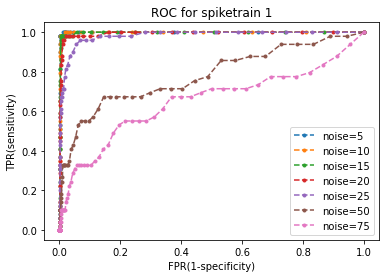

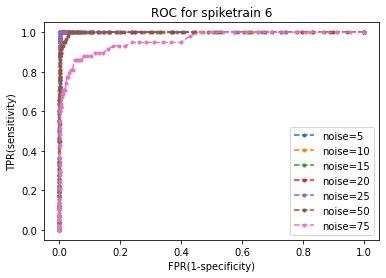

In [70]:
plotROCList(fpr_list=fpr_rec_list, tpr_list=tpr_rec_list, 
            labels=[f"noise={noise_level}" for noise_level in noise_levels],
            spiketrains_labels=spike_indexes)

### Evaluation for NEO at different noise levels

In [71]:
from eapprocessor.process import getResultsEvaluationDatasetArray

In [74]:
evaluator_files_neo = [evaluator_files_dict["neo_file"]
                       for evaluator_files_dict in evaluator_files_dict_list]
evaluator_files_neo

[PosixPath('/mnt/Archivos/data/output/evaluator/threshold_neo_subset_100th_12_5uV_2021-09-28_10-23.h5'),
 PosixPath('/mnt/Archivos/data/output/evaluator/threshold_neo_subset_100th_12_10uV_2021-09-28_10-24.h5'),
 PosixPath('/mnt/Archivos/data/output/evaluator/threshold_neo_subset_100th_12_15uV_2021-09-28_10-25.h5'),
 PosixPath('/mnt/Archivos/data/output/evaluator/threshold_neo_subset_100th_12_20uV_2021-09-28_10-26.h5'),
 PosixPath('/mnt/Archivos/data/output/evaluator/threshold_neo_subset_100th_12_25uV_2021-09-28_10-27.h5'),
 PosixPath('/mnt/Archivos/data/output/evaluator/threshold_neo_subset_100th_12_50uV_2021-09-28_10-28.h5'),
 PosixPath('/mnt/Archivos/data/output/evaluator/threshold_neo_subset_100th_12_75uV_2021-09-28_10-29.h5')]

In [79]:
neo_evaluation_dics = getResultsEvaluationDatasetArray(evaluator_files_neo, indexes_list)

In [80]:
len(neo_evaluation_dics)

7

In [81]:
from eapprocessor.evaluator.spikes import convertToROCList

In [82]:
tpr_neo_list, fpr_neo_list = convertToROCList(neo_evaluation_dics, range_reference=[1,6])

In [83]:
tpr_neo_list.shape

(7, 5, 100, 2)

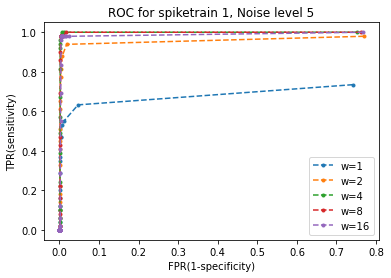

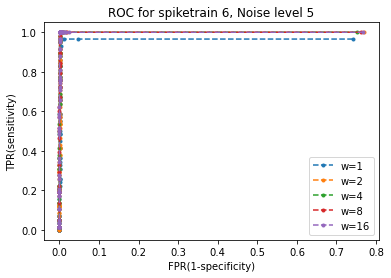

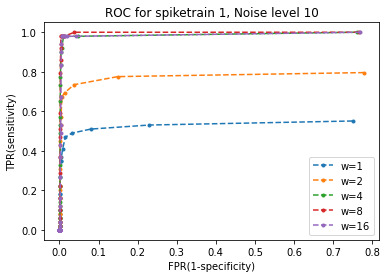

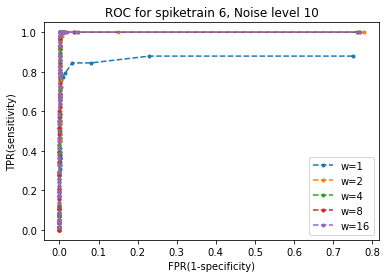

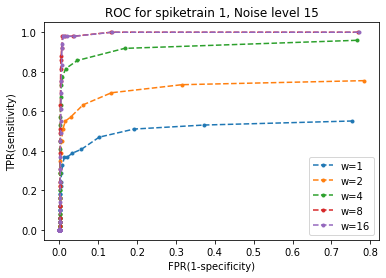

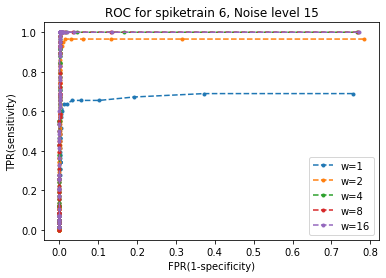

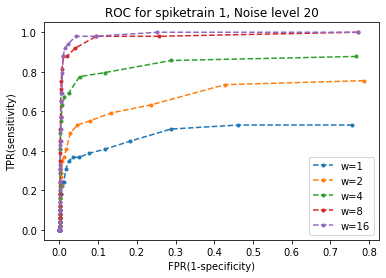

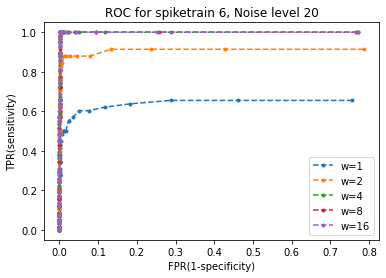

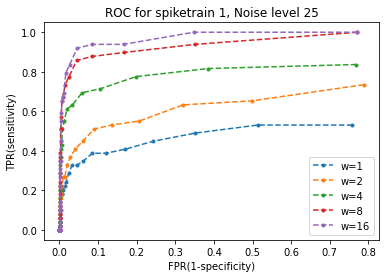

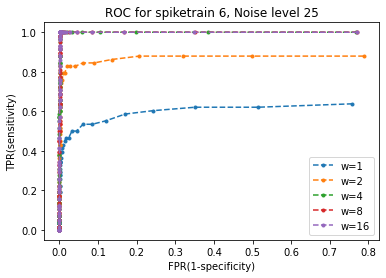

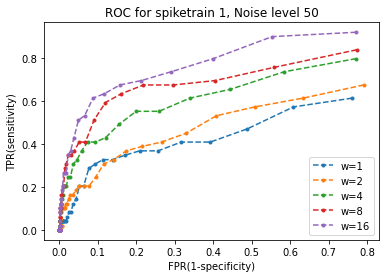

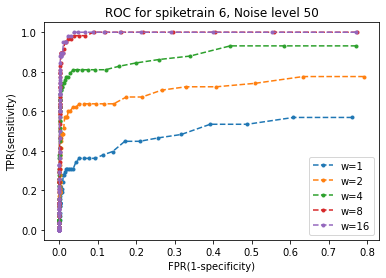

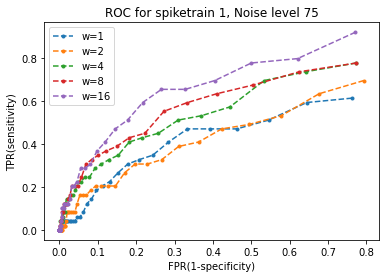

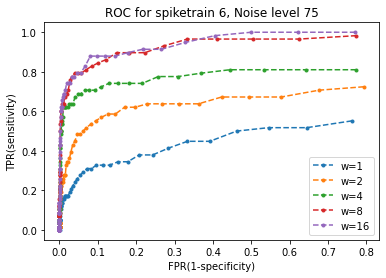

In [87]:
for idx in range(len(tpr_neo_list)):
    plotROCList(fpr_list=fpr_neo_list[idx], tpr_list=tpr_neo_list[idx], 
                labels=[f"w={w_i}" for w_i in w],
                spiketrains_labels=spike_indexes,
                append_title=f", Noise level {noise_levels[idx]}")

Then the results with neo could be grouped together with recordings to compare the results with them:

In [115]:
tpr_all_list = np.array([[tpr_rec_list[idx]] + list(tpr_neo_list[idx]) for idx in range(len(tpr_neo_list))])
fpr_all_list = np.array([[fpr_rec_list[idx]] + list(fpr_neo_list[idx]) for idx in range(len(fpr_neo_list))])

In [116]:
tpr_all_list.shape

(7, 6, 100, 2)

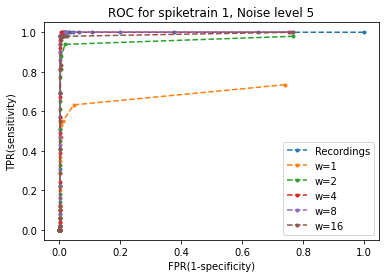

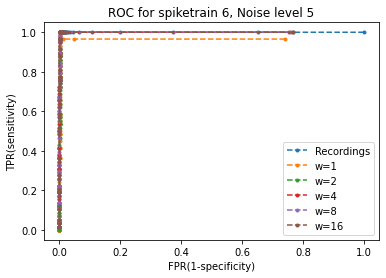

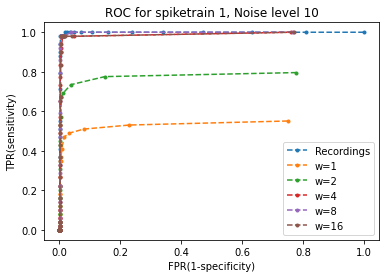

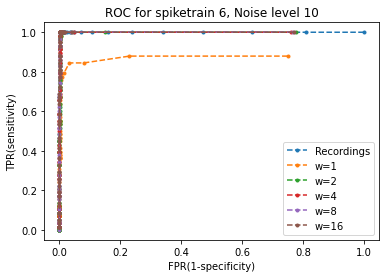

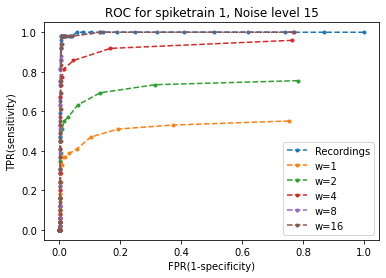

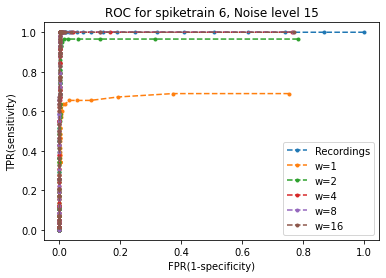

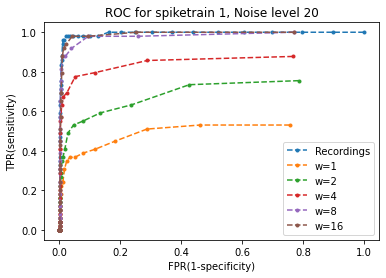

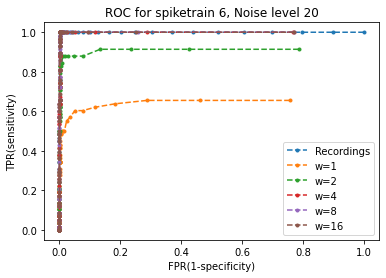

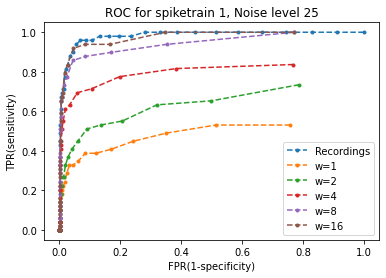

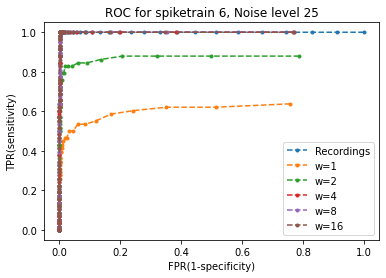

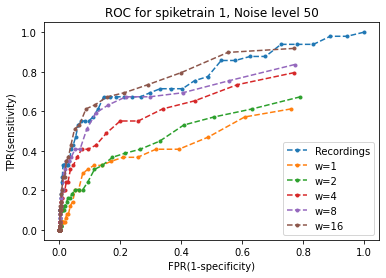

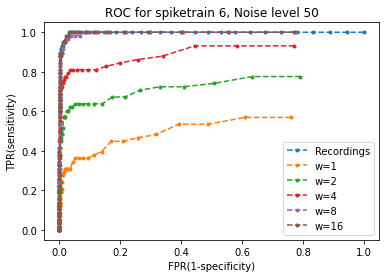

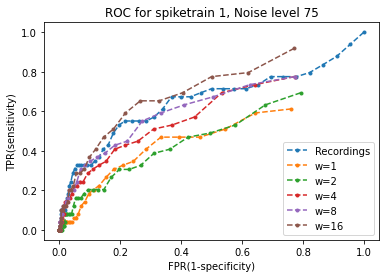

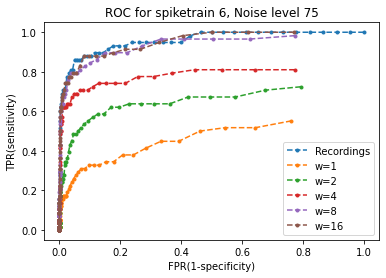

In [117]:
for idx in range(len(tpr_all_list)):
    plotROCList(fpr_list=fpr_all_list[idx], tpr_list=tpr_all_list[idx], 
                labels=["Recordings"]+[f"w={w_i}" for w_i in w],
                spiketrains_labels=spike_indexes,
                append_title=f", Noise level {noise_levels[idx]}")